# Imports


In [178]:
# Provides ways to work with large multidimensional arrays
import numpy as np

# Allows for further data manipulation and analysis
import pandas as pd
import matplotlib.pyplot as plt  # Plotting
import matplotlib.dates as mdates  # Styling dates

import datetime as dt

import time

import yfinance as yf

# Used for file handling like deleting files
# and get data from a directory
import os
from os import listdir
from os.path import isfile, join

import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
# Use plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

import warnings

warnings.simplefilter("ignore")


# Constants


In [179]:
PATH = "C:\\Users\\Eduardo Nuñez\\OneDrive\\Programming\\Python\\Derek Banas\\Investing\\Crypto\\Crypto Data\\"

# Start end date defaults
S_DATE = "2021-01-01"
E_DATE = "2022-12-06"
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

risk_free_rate = 0.0125  # Approximate 10 year bond rate


# Get Stock File Names in a List


In [180]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]

tickers.sort()
len(tickers)


10

# Function that Returns a Dataframe from a CSV


In [181]:
def get_stock_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + ".csv", index_col=0)
    except FileNotFoundError as ex:
        print(ex)
    else:
        return df


# Merge Multiple Stocks in One Dataframe by Column Name


In [182]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()

    for x in tickers:
        df = get_stock_df_from_csv(x)

        # NEW Check if your dataframe has duplicate indexes
        # if not df.index.is_unique:
        #   # Delete duplicates
        #   df = df.loc[~df.index.duplicated()]

        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]

    return mult_df


# Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolio with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight.

$ w_{1}r_{1} + w_{2}r_{2} = r_{p} $ The return of a portfolio is a linear combination of the returns of each stock.

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

$ (w_{1}\sigma_{1} + w_{2}\sigma_{2})^{2} = w_{1}^{2}\sigma_{1}^{2} + 2w_{1}\sigma_{1}w_{2}\sigma_{2}\rho_{1} + w_{2}^{2}\sigma\_{2}^{2}$

# Plotting an Efficient Frontier

# Stock Portfolio

Choose a group of Stocks based on the previous analyses (considering, 5 year, 1 year, 6 months periods at least), and maybe another group of Stocks for a second iteration.


In [183]:
port_list = ["ADA-USD", "ATOM-USD", "ETH-USD", "NEO-USD", "SOL-USD"]
num_stocks = len(port_list)
num_stocks


5

# Merge all data by Closing Price


In [184]:
mult_df = merge_df_by_column_name("Close", S_DATE, E_DATE, *port_list)
mult_df


,ADA-USD,ATOM-USD,ETH-USD,NEO-USD,SOL-USD
Date,,,,,
2021-01-01,0.175350,5.868556,730.367554,14.501692,1.842084
2021-01-02,0.177423,5.414613,774.534973,14.437279,1.799275
2021-01-03,0.204995,5.813898,975.507690,15.960466,2.161752
2021-01-04,0.224762,5.996770,1040.233032,16.278473,2.485097
2021-01-05,0.258314,6.216816,1100.006104,16.888006,2.157217
...,...,...,...,...,...
2022-05-31,0.625254,10.285811,1942.328003,11.541789,45.767841
2022-06-01,0.552750,9.364421,1823.569336,11.156198,40.269669
2022-06-02,0.587795,9.634683,1834.150513,11.438165,40.891346


# Plot Price of Investments over Total Dataset


In [185]:
fig = px.line(mult_df, x=mult_df.index, y=mult_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=800, width=1200, showlegend=True)
fig.show()


# Cumulative Return for all stocks


In [186]:
mult_cum_df = merge_df_by_column_name("cum_return", S_DATE, E_DATE, *port_list)
mult_cum_df


,ADA-USD,ATOM-USD,ETH-USD,NEO-USD,SOL-USD
Date,,,,,
2021-01-01,5.470626,0.899169,2.276111,0.454553,1.936887
2021-01-02,5.535301,0.829617,2.413754,0.452534,1.891875
2021-01-03,6.395501,0.890795,3.040063,0.500278,2.273007
2021-01-04,7.012198,0.918814,3.241773,0.510246,2.612993
2021-01-05,8.058965,0.952529,3.428049,0.529351,2.268238
...,...,...,...,...,...
2022-05-31,19.506878,1.575973,6.053053,0.361775,48.123285
2022-06-01,17.244875,1.434799,5.682955,0.349689,42.342148
2022-06-02,18.338221,1.476208,5.715930,0.358527,42.995820


In [187]:
fig = px.line(mult_cum_df, x=mult_cum_df.index, y=mult_cum_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=800, width=1200, showlegend=True)
fig.show()


# Mean Returns

The logarithmic return is the relation:

$ R = \large ln(\frac{V_{f}}{V_{i}}) $

Where:

$ R = $ Rate of return

$ V_{f} = $ Value at the end of the period

$ V_{i} = $ Value at the beginning of the period

The same can be written in exponential for:

$ V_{f} = V_{i}e^{Rt} $

Where:

$ t = $ number of periods between i and f

In [188]:
# print(mult_df)

# pre_log_returns = mult_df/mult_df.shift(1)
# print(pre_log_returns)

returns = np.log(mult_df / mult_df.shift(1)) # This is using the logarithmic return.
print(returns)
mean_ret = returns.mean() * 252 # there are 252 trading days in a year, and since we are working with daily data we should multiply the mean() by 252 to get an annual value.
mean_ret


             ADA-USD  ATOM-USD   ETH-USD   NEO-USD   SOL-USD
Date                                                        
2021-01-01       NaN       NaN       NaN       NaN       NaN
2021-01-02  0.011753 -0.080507  0.058715 -0.004452 -0.023514
2021-01-03  0.144449  0.071150  0.230695  0.100301  0.183535
2021-01-04  0.092056  0.030970  0.064242  0.019729  0.139393
2021-01-05  0.139134  0.036037  0.055871  0.036760 -0.141493
...              ...       ...       ...       ...       ...
2022-05-31  0.092393 -0.023620 -0.027479 -0.019831 -0.030377
2022-06-01 -0.123252 -0.093848 -0.063092 -0.033979 -0.127983
2022-06-02  0.061472  0.028452  0.005786  0.024960  0.015320
2022-06-03 -0.049052 -0.047941 -0.032737 -0.023462 -0.066534
2022-06-04 -0.019336 -0.024418 -0.012299 -0.016851 -0.059033

[520 rows x 5 columns]


ADA-USD     0.554111
ATOM-USD    0.205582
ETH-USD     0.425221
NEO-USD    -0.134799
SOL-USD     1.444244
dtype: float64

# Correlation

We look for not correlated stocks to form our portfolio. Ideally the correlations should be less than 0.5.


In [189]:
returns.corr()


,ADA-USD,ATOM-USD,ETH-USD,NEO-USD,SOL-USD
ADA-USD,1.000000,0.625248,0.681603,0.665167,0.496378
ATOM-USD,0.625248,1.000000,0.644664,0.638605,0.492898
ETH-USD,0.681603,0.644664,1.000000,0.743925,0.600046
NEO-USD,0.665167,0.638605,0.743925,1.000000,0.580618
SOL-USD,0.496378,0.492898,0.600046,0.580618,1.000000


# Generate Random Weights Summing 1


In [190]:
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print("Weights :", weights)
print("Total Weight :", np.sum(weights))


Weights : [0.06589009 0.05578755 0.38509964 0.25271932 0.2405034 ]
Total Weight : 0.9999999999999999


# Calculating Return of Portfolio using a Random Weighting


In [191]:
np.sum(weights * returns.mean()) * 252


0.525011045031637

# Covariance

In [192]:
returns.cov()

,ADA-USD,ATOM-USD,ETH-USD,NEO-USD,SOL-USD
ADA-USD,0.004152,0.003164,0.002305,0.002942,0.002511
ATOM-USD,0.003164,0.006165,0.002657,0.003442,0.003039
ETH-USD,0.002305,0.002657,0.002755,0.002680,0.002473
NEO-USD,0.002942,0.003442,0.002680,0.004712,0.003129
SOL-USD,0.002511,0.003039,0.002473,0.003129,0.006164


# Calculate Volatility

For discrete random variables, the volatility (standard deviation) of independent (cov = 0) variables is:

$ \sigma = \sqrt{\sum_{i=1}^{N}p_{i}(x_{i}-\mu)^2} $

But, in the case of correlated random variables the variance will be:

$ \small \mathrm{VAR}(\sum_{i=1}^{n} p_{i}X_{i}) = \sum_{i,j}p_{i}p_{j}\mathrm{COV}(X_{i},X_{j}) $

Where:

$ p_{i}, p_{j} = $ Weights for each random variable

Expressed in a vector notation, using the dot product we have:

$ \vec{q} = \vec{COV}(X_{i},X_{j}) \cdot \vec{p} \Rightarrow$      COV is matrix of covariances between all different stocks in the portfolio, thus this product gives a vector as output

$ \sqrt{\vec{p} \cdot \vec{q}} = $ Volatility of the portfolio


In [193]:
np.dot(returns.cov() * 252, weights)


array([0.67671918, 0.80040617, 0.66352071, 0.84712583, 0.89728221])

In [194]:
# Volatility
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))) # This is a weighted standard deviation of the returns of the stocks


0.8801408167231909

# Analyzing Returns & Risks of 10000 Combinations

In [195]:
p_ret = []  # Returns for each portfolio
p_vol = []  # Volatility for each portfolio
p_SR = []  # Sharpe Ratio for each portfolio
p_wt = []  # Weights for each portfolio

for x in range(10000):
    # Calculate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)

    # Calculate the return for this particular combination and append
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)

    # Calculate the volatility for this particular combination and append
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)

    # Calculate the Sharpe Ratio and append
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)

    p_wt.append(p_weights)

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt


(array([0.38547623, 0.29694548, 0.33449845, ..., 0.18388725, 0.61019751,
        0.37906446]),
 array([0.93104371, 0.92116507, 0.96976923, ..., 1.01893648, 0.86054238,
        0.89551566]),
 array([0.40060013, 0.30878883, 0.33203616, ..., 0.1682021 , 0.69455907,
        0.40933339]),
 array([[0.16891793, 0.28521867, 0.13400116, 0.26507744, 0.1467848 ],
        [0.27526187, 0.22294094, 0.13591625, 0.30881285, 0.05706808],
        [0.1832869 , 0.33112339, 0.01020807, 0.33314085, 0.14224078],
        ...,
        [0.20105076, 0.49246653, 0.00110071, 0.29782208, 0.00755991],
        [0.13668789, 0.01074592, 0.44722552, 0.1541012 , 0.25123946],
        [0.25729516, 0.21963435, 0.23027848, 0.20863334, 0.08415867]]))

# Plotting the Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

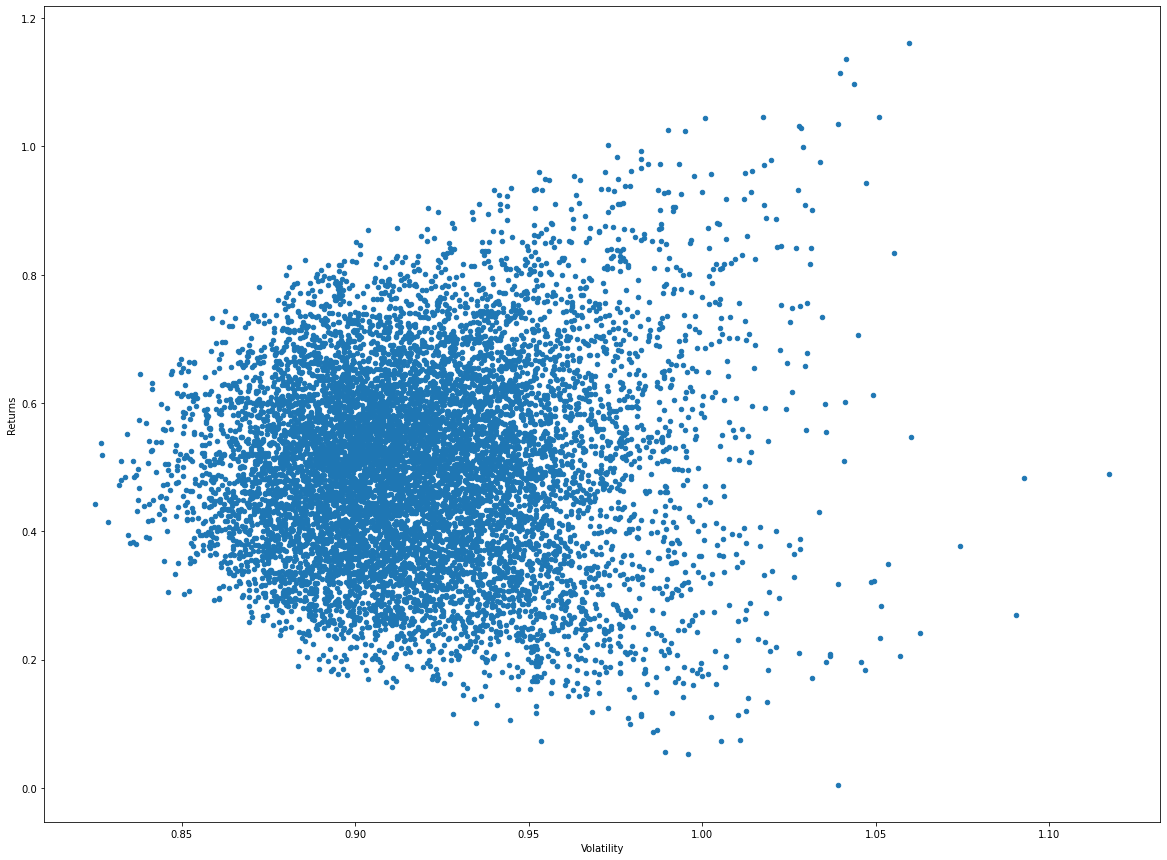

In [196]:
ports = pd.DataFrame({"Returns": p_ret, "Volatility": p_vol})
ports.plot(x="Volatility", y="Returns", kind="scatter", figsize=(20, 15))


# Sharpe Ratio

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find a portfolio that provides the best return for the lowest amount of risk.

$ Sharpe Ratio = \Large\frac{r_{i}-r_{f}}{\sigma_{i}}$

$ \Large r_{f} = $ Risk Free Rate

$ \Large r_{i} = $ Rate of Return of the Stock

$ \Large \sigma_{i} = $ Standard deviation of the Stock

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ratio Decreases

In [197]:
SR_idx = np.argmax(p_SR)
total = 1059
print(f"Total: {total}")
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f -> Value= %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100), p_wt[SR_idx][i] * total))
    i += 1

print("\nVolatility :", p_vol[SR_idx])
print("Return :", p_ret[SR_idx])


Total: 1059
Stock : ADA-USD : 13.50 -> Value= 142.93
Stock : ATOM-USD : 1.87 -> Value= 19.81
Stock : ETH-USD : 11.07 -> Value= 117.22
Stock : NEO-USD : 1.74 -> Value= 18.48
Stock : SOL-USD : 71.82 -> Value= 760.56

Volatility : 1.059551277086218
Return : 1.1605908421806628


# Amount of shares to buy

In [75]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)

    # Holds the number of shares for each stock
    shares = []

    # Holds cost of shares for each stock
    cost_shares = []

    i = 0
    while i < num_stocks:
        # Get max amount to spent on stock
        max_price = one_price * wts[i]

        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])

        # If the user wants to force buying one share, then do it
        if force_one and num_shares == 0:
            num_shares = 1

        shares.append(num_shares)

        # Gets cost of those shares and appends to the list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1

    return shares, cost_shares


# Get Portfolio Weighting

In [76]:
def get_port_weighting(share_cost):
    # Holds weights for stocks
    stock_wts = []

    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)

    for x in share_cost:
        stock_wts.append(x / tot_val)

    return stock_wts


# Returns the value of portfolio by Date

In [77]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name("Close", date, date, *port_list)

    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()

    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices,[])
    return port_prices


# Approximate Portfolio Weighting based on Request

In [78]:
port_list = ["CALX", "NOVT", "RGEN", "LLY", "AMD", "NFLX", "COST", "BJ", "WING", "MSCI", "CBRE"]

port_wts = [7, 16, 4, 17, 2, 2, 16, 4, 15, 15, 2]

# print(sum(port_wts))

# Get all stock prices on the starting date (when you make the investment)
port_df_start = merge_df_by_column_name("Close", "2022-01-07", "2022-01-07", *port_list)
# print(port_df_start)

# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()
# print(port_prices)

# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])
# print(port_prices)

tot_shares, share_cost = get_port_shares(104.779, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
port_df_end = get_port_val_by_date("2022-03-10", tot_shares, port_list)
print(port_df_end)


[Errno 2] No such file or directory: 'C:\\Users\\Eduardo Nuñez\\OneDrive\\Programming\\Python\\Derek Banas\\Investing\\Crypto\\Crypto Data\\CALX.csv'


AttributeError: 'NoneType' object has no attribute 'index'